In [1]:
import pandas as pd

import numpy as np

import statsmodels.api as sm

from statsmodels.formula.api import ols

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
food = pd.read_csv("/Users/david/Desktop/IronHack/Projects/food_advisor/raw/1_150.csv")

In [4]:
food.head()

,Unnamed: 0,Product Name,Brands,NOVA 4,Nutri-Score,Countries,Additives,Eco-Score,Energía,Grasas saturadas,Azúcares
0,0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [5]:
food.shape

(14800, 11)

In [6]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        14800 non-null  int64 
 1   Product Name      14800 non-null  object
 2   Brands            14800 non-null  object
 3   NOVA 4            14800 non-null  object
 4   Nutri-Score       14800 non-null  object
 5   Countries         14800 non-null  object
 6   Additives         14800 non-null  object
 7   Eco-Score         14800 non-null  object
 8   Energía           14009 non-null  object
 9   Grasas saturadas  14006 non-null  object
 10  Azúcares          14006 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [7]:
# delete the column "Unnamed: 0"
food.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
# check duplicated rows

food[food.duplicated()].shape

(24, 10)

In [9]:
# delete duplicated rows

food.drop_duplicates(inplace=True)


In [10]:
# check duplicated rows again

food[food.duplicated()].shape

(0, 10)

In [11]:
food.shape

(14776, 10)

In [12]:
food.head()

,Product Name,Brands,NOVA 4,Nutri-Score,Countries,Additives,Eco-Score,Energía,Grasas saturadas,Azúcares
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [13]:
# make the name of the columns snake-case and lowercase

food.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

In [14]:
food.head()

,product_name,brands,nova_4,nutri-score,countries,additives,eco-score,energía,grasas_saturadas,azúcares
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [15]:
# change the name of the columns

food.rename(columns={
    "grasas_saturadas": "saturated_fats",
    "azúcares": "sugars",
    "energía": "energy"
}, inplace=True)

In [16]:
food.head()

,product_name,brands,nova_4,nutri-score,countries,additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g


In [17]:
# check duplicated rows regarding "product name"

food[food.duplicated(subset=['product_name'])].shape

(215, 10)

In [18]:
# delete duplicated rows regarding "product name"

food.drop_duplicates(subset=['product_name'], keep='first', inplace=True)

food.shape

(14561, 10)

In [19]:
# separate the product_name column into "product" and "weight"

food[['product', 'weight']] = food['product_name'].str.rsplit(' - ', n=1, expand=True)

food.head()

,product_name,brands,nova_4,nutri-score,countries,additives,eco-score,energy,saturated_fats,sugars,product,weight
0,Nutella - Ferrero - 400 g,Ferrero,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Italia, Luxemburgo...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g",Nutella - Ferrero,400 g
1,Prince chocolate - Lu - 300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"Argelia, Bélgica, Francia, Polinesia Francesa,...","E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g,Prince chocolate - Lu,300 g
2,Coca-Cola - 330 mL,Coca cola,Alimentos ultraprocesados,E,"Bélgica, Francia, Alemania, Hungría, Italia, S...","E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g",Coca-Cola,330 mL
3,Nutella - Ferrero - 1 kg,Ferrero,Alimentos ultraprocesados,E,"Argelia, Bélgica, Francia, Alemania, Guadalupe...","E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g",Nutella - Ferrero,1 kg
4,Coca-Cola zero - 330 ml,Coca-Cola,Alimentos ultraprocesados,B,"Bélgica, Francia, Alemania, Hungría, Italia, E...","E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g,Coca-Cola zero,330 ml


In [20]:
# check duplicated rows regarding "product"

food[food.duplicated(subset=['product'])].shape


(787, 12)

In [21]:
# delete duplicated rows regarding "product"

food.drop_duplicates(subset=['product'], keep='first', inplace=True)

In [22]:
food.shape

(13774, 12)

In [23]:
# delete the column "product_name" and "countries"

food.drop("product_name", axis=1, inplace=True)

food.drop("countries", axis=1, inplace=True)


food.head()

,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars,product,weight
0,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g",Nutella - Ferrero,400 g
1,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g,Prince chocolate - Lu,300 g
2,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g",Coca-Cola,330 mL
4,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g,Coca-Cola zero,330 ml
5,"Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,2158 kj(515 kcal),"11,5 g","35,8 g","Ferrero- Nutella Biscuits Resealable Bag, 304g...",304 g


In [24]:
# Relocate the columns "product" and "weight"

food = food[['product', 'weight'] + [col for col in food.columns if col not in ['product', 'weight']]]

food.head()

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero,400 g,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),"10,6 g","56,3 g"
1,Prince chocolate - Lu,300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),"5,6 g",32 g
2,Coca-Cola,330 mL,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0 g,"10,6 g"
4,Coca-Cola zero,330 ml,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0 g,0 g
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...",304 g,"Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,2158 kj(515 kcal),"11,5 g","35,8 g"


## Work with "saturated fats" and "sugars" columns

In [25]:
# Tranform "saturated fats" and "sugars" columns by deleting non numeric characters

food['saturated_fats'] = food['saturated_fats'].str.replace('<', '').str.replace('g', '')
food['sugars'] = food['sugars'].str.replace('<', '').str.replace('g', '')

In [26]:
# Tranform "saturated fats" and "sugars" columns by deleting empty spaces

food['saturated_fats'] = food['saturated_fats'].str.replace(',', '.').str.replace(' ', '')
food['sugars'] = food['sugars'].str.replace(',', '.').str.replace(' ', '')

In [27]:
# Tranform "saturated fats" and "sugars" columns by transforming values into numeric data type and producing nulls when not possible 

food['saturated_fats'] = pd.to_numeric(food['saturated_fats'], errors='coerce')
food['sugars'] = pd.to_numeric(food['sugars'], errors='coerce')

In [28]:
#food['saturated_fats'].replace('', np.nan, inplace=True)

In [29]:
# Transform Tranform "saturated fats" and "sugars" columns into float type.

food['saturated_fats'] = food['saturated_fats'].astype(float)
food['sugars'] = food['sugars'].astype(float)

In [30]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13774 entries, 0 to 14799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         13774 non-null  object 
 1   weight          12972 non-null  object 
 2   brands          13774 non-null  object 
 3   nova_4          13774 non-null  object 
 4   nutri-score     13774 non-null  object 
 5   additives       13774 non-null  object 
 6   eco-score       13774 non-null  object 
 7   energy          13054 non-null  object 
 8   saturated_fats  12865 non-null  float64
 9   sugars          12849 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [31]:
food.head()

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero,400 g,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,2252 kj(539 kcal),10.6,56.3
1,Prince chocolate - Lu,300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,1962 kj(467 kcal),5.6,32.0
2,Coca-Cola,330 mL,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,180 kj(42 kcal),0.0,10.6
4,Coca-Cola zero,330 ml,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,1 kj(0 kcal),0.0,0.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...",304 g,"Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,2158 kj(515 kcal),11.5,35.8


## Work wit "energy" column

In [32]:
# Transform "energy" column to have only the energy in Kcal  

food['energy'] = food['energy'].str.extract(r'\((\d+) kcal\)', expand=False)

food.head()

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars
0,Nutella - Ferrero,400 g,Ferrero,Alimentos ultraprocesados,E,"E322 - Lecitinas, E322i - Lecitina",Eco-Score D,539,10.6,56.3
1,Prince chocolate - Lu,300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322 - Lecitinas, E322i - Lecitina, E500 - Car...",Eco-Score C,467,5.6,32.0
2,Coca-Cola,330 mL,Coca cola,Alimentos ultraprocesados,E,"E150d - Caramelo de sulfito amónico, E338 - Ác...",Eco-Score aún no aplicable,42,0.0,10.6
4,Coca-Cola zero,330 ml,Coca-Cola,Alimentos ultraprocesados,B,"E150d - Caramelo de sulfito amónico, E331 - Ci...",Eco-Score aún no aplicable,0,0.0,0.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...",304 g,"Nutella, Ferrero",Nivel de procesamiento de alimentos desconocido,E,"u, n, k, n, o, w, n",Eco-Score C,515,11.5,35.8


In [33]:
# Transform "energy" column into float data type  

food['energy'] = food['energy'].astype(float)

In [34]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13774 entries, 0 to 14799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product         13774 non-null  object 
 1   weight          12972 non-null  object 
 2   brands          13774 non-null  object 
 3   nova_4          13774 non-null  object 
 4   nutri-score     13774 non-null  object 
 5   additives       13774 non-null  object 
 6   eco-score       13774 non-null  object 
 7   energy          12970 non-null  float64
 8   saturated_fats  12865 non-null  float64
 9   sugars          12849 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [35]:
food.corr()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_97196/1888934596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


,energy,saturated_fats,sugars
energy,1.000000,0.552363,0.31481
saturated_fats,0.552363,1.000000,0.13642
sugars,0.314810,0.136420,1.00000


## Work with "eco-score" column

In [36]:
food["eco-score"].unique()

array(['Eco-Score D', 'Eco-Score C', 'Eco-Score aún no aplicable',
       'Eco-Score B', 'Eco-Score A', 'El Eco-Score no pudo ser calculado',
       'Eco-Score E'], dtype=object)

In [37]:
# transform unknown category values into nulls

food["eco-score"] = food["eco-score"].replace("Eco-Score aún no aplicable", np.nan)
food["eco-score"] = food["eco-score"].replace("El Eco-Score no pudo ser calculado", np.nan)

In [38]:
# reduce text in "eco-score" column

food["eco-score"] = food["eco-score"].str.replace("Eco-Score A", "A")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score B", "B")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score C", "C")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score D", "D")
food["eco-score"] = food["eco-score"].str.replace("Eco-Score E", "E")


In [39]:
# create a new column "nutri-score_num"

food["eco-score_num"] = food["eco-score"].copy()

In [40]:
# asign numeric values to "nutri-score"

food["eco-score_num"] = food["eco-score_num"].str.replace("A", "1")
food["eco-score_num"] = food["eco-score_num"].str.replace("B", "2")
food["eco-score_num"] = food["eco-score_num"].str.replace("C", "3")
food["eco-score_num"] = food["eco-score_num"].str.replace("D", "4")
food["eco-score_num"] = food["eco-score_num"].str.replace("E", "5")

In [41]:
# transform "nutri-score" values into float data type.

food['eco-score_num'] = food['eco-score_num'].astype(float)

In [42]:
print(food["eco-score_num"].unique())
print(sum(food["eco-score_num"].isnull()))

[ 4.  3. nan  2.  1.  5.]
4978


## Work with "nutri-score" column

In [43]:
food["nutri-score"].unique()

array(['E', 'D', 'B', 'A', 'C', 'UNKNOWN', 'NOT-APPLICABLE'], dtype=object)

In [44]:
# transform "unknown" category values into nulls

food["nutri-score"] = food["nutri-score"].replace("UNKNOWN", np.nan)
food["nutri-score"] = food["nutri-score"].replace("NOT-APPLICABLE", np.nan)
food["nutri-score"] = food["nutri-score"].replace("unknown", np.nan)


In [45]:
# create a new column "nutri-score_num"

food["nutri-score_num"] = food["nutri-score"].copy()


In [46]:
# asign numeric values to "nutri-score"

food["nutri-score_num"] = food["nutri-score_num"].str.replace("A", "1")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("B", "2")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("C", "3")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("D", "4")
food["nutri-score_num"] = food["nutri-score_num"].str.replace("E", "5")

In [47]:
# transform "nutri-score" values into float data type.

food['nutri-score_num'] = food['nutri-score_num'].astype(float)

In [48]:
print(food["nutri-score_num"].unique())
print(sum(food["nutri-score_num"].isnull()))

[ 5.  4.  2.  1.  3. nan]
2111


## Work with "nova_4" column

In [49]:
food["nova_4"].unique()

array(['Alimentos ultraprocesados',
       'Nivel de procesamiento de alimentos desconocido',
       'Alimentos no procesados o mínimamente procesados',
       'Alimentos procesados', 'Ingredientes culinarios procesados',
       'unknown'], dtype=object)

In [50]:
# transform unknown category values into nulls

food["nova_4"] = food["nova_4"].replace("Nivel de procesamiento de alimentos desconocido", np.nan)
food["nova_4"] = food["nova_4"].replace("unknown", np.nan)

In [51]:
# create a new column "nova_4_num"

food["nova_4_num"] = food["nova_4"].copy()


In [52]:
# asign numeric values to "nova_4_num"

food["nova_4_num"] = food["nova_4_num"].str.replace("Alimentos ultraprocesados", "4")
food["nova_4_num"] = food["nova_4_num"].str.replace("Alimentos procesados", "3")
food["nova_4_num"] = food["nova_4_num"].str.replace("Ingredientes culinarios procesados", "2")
food["nova_4_num"] = food["nova_4_num"].str.replace("Alimentos no procesados o mínimamente procesados", "1")


In [53]:
# transform "nova_4_num" values into float data type.

food['nova_4_num'] = food['nova_4_num'].astype(float)

In [54]:
print(food["nova_4"].unique())
print(sum(food["nova_4"].isnull()))

['Alimentos ultraprocesados' nan
 'Alimentos no procesados o mínimamente procesados' 'Alimentos procesados'
 'Ingredientes culinarios procesados']
4683


In [55]:
print(food["nova_4_num"].unique())
print(sum(food["nova_4_num"].isnull()))

[ 4. nan  1.  3.  2.]
4683


## Work with "additives" column

In [56]:
# Delete empty spaces between the string values

food['additives'] = food['additives'].str.replace(' ', '')
food.head()

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_4_num
0,Nutella - Ferrero,400 g,Ferrero,Alimentos ultraprocesados,E,"E322-Lecitinas,E322i-Lecitina",D,539.0,10.6,56.3,4.0,5.0,4.0
1,Prince chocolate - Lu,300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"E322-Lecitinas,E322i-Lecitina,E500-Carbonatosd...",C,467.0,5.6,32.0,3.0,4.0,4.0
2,Coca-Cola,330 mL,Coca cola,Alimentos ultraprocesados,E,"E150d-Caramelodesulfitoamónico,E338-Ácidofosfó...",NaN,42.0,0.0,10.6,NaN,5.0,4.0
4,Coca-Cola zero,330 ml,Coca-Cola,Alimentos ultraprocesados,B,"E150d-Caramelodesulfitoamónico,E331-Citratosde...",NaN,0.0,0.0,0.0,NaN,2.0,4.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...",304 g,"Nutella, Ferrero",NaN,E,"u,n,k,n,o,w,n",C,515.0,11.5,35.8,3.0,5.0,NaN


In [57]:
food.iloc[1]['additives']

'E322-Lecitinas,E322i-Lecitina,E500-Carbonatosdesodio,E500ii-Bicarbonatodesodio,E503-Carbonatosdeamonio,E503i-Carbonatodeamonio'

In [58]:
# Leave only the additives codes

food['additives'] = food['additives'].str.findall(r'(E\d+[a-zA-Z]*)')
food.head()

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_4_num
0,Nutella - Ferrero,400 g,Ferrero,Alimentos ultraprocesados,E,"[E322, E322i]",D,539.0,10.6,56.3,4.0,5.0,4.0
1,Prince chocolate - Lu,300 g,"Lu, Mondelez",Alimentos ultraprocesados,D,"[E322, E322i, E500, E500ii, E503, E503i]",C,467.0,5.6,32.0,3.0,4.0,4.0
2,Coca-Cola,330 mL,Coca cola,Alimentos ultraprocesados,E,"[E150d, E338]",NaN,42.0,0.0,10.6,NaN,5.0,4.0
4,Coca-Cola zero,330 ml,Coca-Cola,Alimentos ultraprocesados,B,"[E150d, E331, E338, E950, E951]",NaN,0.0,0.0,0.0,NaN,2.0,4.0
5,"Ferrero- Nutella Biscuits Resealable Bag, 304g...",304 g,"Nutella, Ferrero",NaN,E,[],C,515.0,11.5,35.8,3.0,5.0,NaN


In [59]:
# Delete lists from "additives" column values and leave only the additives, or null values if the list is empty.

food['additives'] = food['additives'].apply(lambda x: ','.join(x) if isinstance(x, list) and x else np.nan if x == [] else x)

food.tail()

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_4_num
14795,Macarrones integrales ecológicos - Consum,500 g,Consum,NaN,A,NaN,B,336.0,0.5,4.0,2.0,1.0,NaN
14796,Yogur con zumo natural de melocotón - Danone,240,Danone,Alimentos ultraprocesados,B,NaN,NaN,77.0,2.0,7.8,NaN,2.0,4.0
14797,Mascarpone - Lovilio,250 g,Lovilio,Alimentos procesados,D,E330,C,355.0,24.9,3.0,3.0,4.0,3.0
14798,Bio Avena - Milbona,250g (2 x 125 g),Milbona,Alimentos ultraprocesados,C,E415,NaN,83.0,0.3,9.7,NaN,3.0,4.0
14799,Sabor manzana grosella negra frambuesa - Carre...,2 l,Carrefour,Alimentos ultraprocesados,D,E330,C,28.0,0.0,6.4,3.0,4.0,4.0


In [60]:
food["additives"].isnull().sum()

8083

In [61]:
food["nutri-score"].isnull().sum()

2111

In [62]:
food["nutri-score"].isnull().sum()

2111

In [63]:
food["nova_4"].isnull().sum()

4683

In [64]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13774 entries, 0 to 14799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product          13774 non-null  object 
 1   weight           12972 non-null  object 
 2   brands           13774 non-null  object 
 3   nova_4           9091 non-null   object 
 4   nutri-score      11663 non-null  object 
 5   additives        5691 non-null   object 
 6   eco-score        8796 non-null   object 
 7   energy           12970 non-null  float64
 8   saturated_fats   12865 non-null  float64
 9   sugars           12849 non-null  float64
 10  eco-score_num    8796 non-null   float64
 11  nutri-score_num  11663 non-null  float64
 12  nova_4_num       9091 non-null   float64
dtypes: float64(6), object(7)
memory usage: 1.5+ MB


In [65]:
food.describe().T

,count,mean,std,min,25%,50%,75%,max
energy,12970.0,267.259445,196.945570,0.0,76.25,257.0,420.0,3440.0
saturated_fats,12865.0,4.481348,7.394765,0.0,0.30,1.5,5.5,95.0
sugars,12849.0,11.098541,16.222904,0.0,1.00,4.0,14.0,105.0
eco-score_num,8796.0,2.981469,1.145174,1.0,2.00,3.0,4.0,5.0
nutri-score_num,11663.0,3.008231,1.337019,1.0,2.00,3.0,4.0,5.0
nova_4_num,9091.0,3.374436,1.003153,1.0,3.00,4.0,4.0,4.0


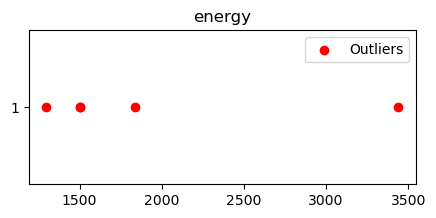

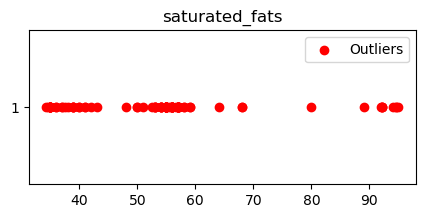

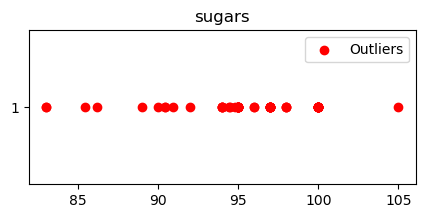

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ["energy", "saturated_fats","sugars"]
k = 1.5

for e in columns:
    # Calculate the quartiles and IQR
    Q1 = food[e].quantile(0.10)
    Q3 = food[e].quantile(0.90)
    IQR = Q3 - Q1

    # Calculate the lower and upper fences
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR

    # Set up the boxplot
    plt.figure(figsize=(5, 2))
    plt.title("Boxplot with Outliers")
    plt.boxplot(food[e], vert=False, showfliers=False)  # Exclude default outliers

    # Include the outliers in the boxplot
    outliers = food[(food[e] < lower_fence) | (food[e] > upper_fence)]
    plt.scatter(outliers[e], [1] * len(outliers), color='red', label='Outliers')
    plt.title(e)
    # Show the plot
    plt.legend()
    plt.show()

In [67]:
food[food['energy']>1250]

,product,weight,brands,nova_4,nutri-score,additives,eco-score,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_4_num
1454,Helices con tomate y espinacas - Gallo,450g,Gallo,Alimentos no procesados o mínimamente procesados,A,NaN,NaN,3440.0,0.500,4.000,NaN,1.0,1.0
5319,María - Gullón,4 x 200 g,Gullón,Alimentos ultraprocesados,D,"E223,E322,E322i,E502",C,1837.0,1.000,19.000,3.0,4.0,4.0
9819,RITZ - Nabisco,89 g,Nabisco,Alimentos ultraprocesados,E,"E322,E322i,E341,E341i,E500,E500ii,E503,E503ii",C,1500.0,6.667,28.667,3.0,5.0,4.0
12262,Hojuela de avena de grano entero - Quaker,1.19kg,Quaker,NaN,A,NaN,NaN,1500.0,1.330,1.330,NaN,1.0,NaN
12889,5555,None,"u, n, k, n, o, w, n",Alimentos ultraprocesados,NaN,"E171,E905,E905c,E905ci",NaN,1297.0,19.000,16.000,NaN,NaN,4.0


In [68]:
food[food['saturated_fats']>50]['product']

343                Mantequilla - CENTRAL LECHERA ASTURIANA
471                                    Mantequilla sin sal
638            Mantequilla grano de sal de mar - Président
856                                       Butter - Milbona
1246                                     Pilos unt sarat -
1419                  Mantequilla con sal tarrina - Primor
1825                  Huile de coco vierge bio - Vita d'or
2380                                   Mantequilla con sal
2381               Mantequilla Sin Sal Añadida - Hacendado
2873                                Kokosnussöl - VITAD'OR
3097                   Mantequilla sin lactosa - Hacendado
3409                              Coco rallado - Hacendado
3779                                    Consum Mantequilla
3941         Mantega Cadi D. o. p Pastilla 125 GRS. C / 12
4159                              Gold Butter - Bayernland
4302                            Mantequilla - Casa Azzurra
4742                                 Coco chips - Rapunz

#### Since all these products are butters, they are not outliers. We will keep them.  

In [69]:
#food.dropna(thresh=12, inplace=True)

In [70]:
food.corr()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_97196/1888934596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


,energy,saturated_fats,sugars,eco-score_num,nutri-score_num,nova_4_num
energy,1.000000,0.552363,0.314810,0.196863,0.433311,0.044356
saturated_fats,0.552363,1.000000,0.136420,0.283849,0.498101,0.048565
sugars,0.314810,0.136420,1.000000,0.044583,0.418079,0.162759
eco-score_num,0.196863,0.283849,0.044583,1.000000,0.296939,0.009933
nutri-score_num,0.433311,0.498101,0.418079,0.296939,1.000000,0.327330
nova_4_num,0.044356,0.048565,0.162759,0.009933,0.327330,1.000000


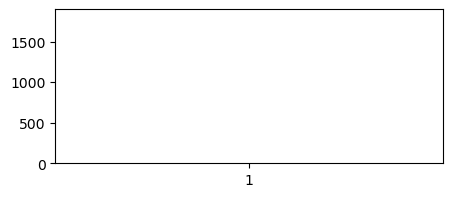

In [71]:
plt.figure(figsize=(5, 2))
plt.boxplot(food['energy'])
plt.ylim(bottom=0, top=1900)  # Adjust the limits as needed
plt.show()

In [72]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13774 entries, 0 to 14799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product          13774 non-null  object 
 1   weight           12972 non-null  object 
 2   brands           13774 non-null  object 
 3   nova_4           9091 non-null   object 
 4   nutri-score      11663 non-null  object 
 5   additives        5691 non-null   object 
 6   eco-score        8796 non-null   object 
 7   energy           12970 non-null  float64
 8   saturated_fats   12865 non-null  float64
 9   sugars           12849 non-null  float64
 10  eco-score_num    8796 non-null   float64
 11  nutri-score_num  11663 non-null  float64
 12  nova_4_num       9091 non-null   float64
dtypes: float64(6), object(7)
memory usage: 1.5+ MB
